In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pca-mnist/NewCodesPractise.ipynb
/kaggle/input/pca-mnist/README.md
/kaggle/input/pca-mnist/PCA_Implementation_1.ipynb
/kaggle/input/pca-minst-data-train/NewCodesPractise.ipynb
/kaggle/input/pca-minst-data-train/README.md
/kaggle/input/pca-minst-data-train/PCA_Implementation_1.ipynb
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
import matplotlib.pyplot as plt

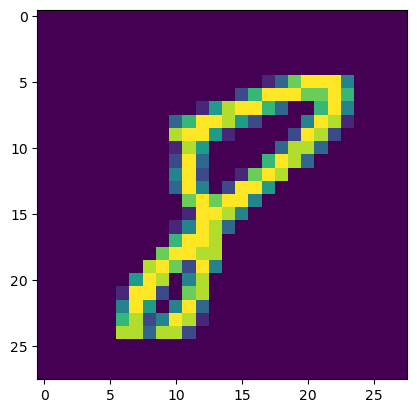

In [6]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y= df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
y_train.shape

(33600,)

In [11]:
X_test.shape

(8400, 784)

In [12]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [14]:

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
y_pred= knn.predict(X_test)
print(time.time() -start)

12.308321475982666


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
### PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=251)

In [29]:
X_train_pca=pca.fit_transform(X_train)

In [30]:
X_test_pca = pca.transform(X_test)

In [31]:
X_train_pca.shape

(33600, 251)

In [32]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [33]:
y_pred_pca= knn.predict(X_test_pca)

In [34]:
accuracy_score(y_test,y_pred_pca)

0.9478571428571428

In [27]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn.fit(X_train_pca, y_train)
    
    y_pred_pca= knn.predict(X_test_pca)
    
    print(accuracy_score(y_test,y_pred_pca))
    
    
    

0.25857142857142856
0.3238095238095238
0.5101190476190476
0.666547619047619
0.7383333333333333
0.8223809523809524
0.8426190476190476
0.8716666666666667
0.8858333333333334
0.9053571428571429
0.9114285714285715
0.9178571428571428
0.9279761904761905
0.9346428571428571
0.9395238095238095
0.9378571428571428
0.9403571428571429
0.9397619047619048
0.9433333333333334
0.9441666666666667
0.944047619047619
0.9430952380952381
0.945
0.945952380952381
0.9464285714285714
0.9480952380952381
0.9471428571428572
0.9470238095238095
0.9480952380952381
0.95
0.9508333333333333
0.9513095238095238
0.9498809523809524
0.9503571428571429
0.9502380952380952
0.9520238095238095
0.9514285714285714
0.9525
0.9523809523809523
0.9520238095238095
0.9517857142857142
0.9534523809523809
0.9530952380952381
0.9533333333333334
0.9539285714285715
0.9534523809523809
0.9530952380952381
0.9536904761904762
0.9532142857142857
0.954047619047619
0.9541666666666667
0.9528571428571428
0.954047619047619
0.9538095238095238
0.953928571428571

KeyboardInterrupt: 

In [35]:
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [36]:
X_train_pc

array([[-2.71862284, -0.48989263],
       [-0.67696649, -6.75303488],
       [-3.0334224 ,  6.51022116],
       ...,
       [ 2.14870001,  0.78155044],
       [ 1.05954671,  0.94752666],
       [17.70254092,  1.96176291]])

In [37]:
import plotly.express as px
y_train_pc = y_train.astype(str)
fig = px.scatter(x=X_train_pc[:,0],y=X_train_pc[:,1], color=y_train_pc,color_discrete_sequence=
                px.colors.qualitative.G10)

fig.show()

In [38]:
pca = PCA(n_components=3)
X_train_pc3 = pca.fit_transform(X_train)
X_test_pc3 = pca.transform(X_test)

In [39]:
X_train_pc3.shape

(33600, 3)

In [40]:
y_train_pc3 = y_train.astype(str)
fig = px.scatter_3d(x=X_train_pc3[:,0],y=X_train_pc3[:,1],z=X_train_pc3[:,2], color=y_train_pc3)

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))

fig.show()

In [41]:
pca.explained_variance_

# Eigen values

array([40.67111198, 29.17023398, 26.74459609])

In [42]:
pca.components_.shape

# Eigen Vectors

(3, 784)

In [43]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926968, 3.80423899])

In [44]:
pca = PCA(n_components=None)
X_train_pcn = pca.fit_transform(X_train)
X_test_pcn = pca.transform(X_test)

In [45]:
X_train_pcn.shape

(33600, 784)

In [46]:
pca.explained_variance_.shape

(784,)

In [47]:
pca.components_.shape

(784, 784)

In [48]:
np.cumsum(pca.explained_variance_ratio_)*100

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

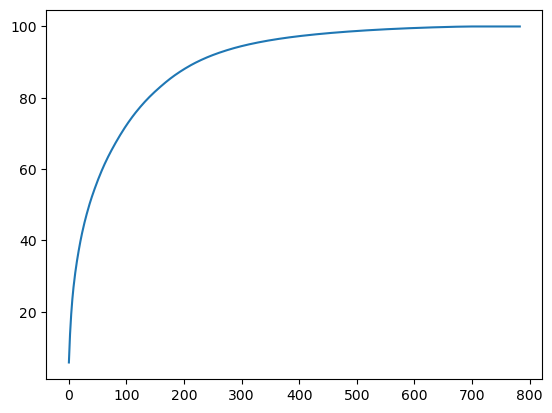

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)